In [50]:
# Import libraries

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [51]:
# import the data

NVR = pdr.get_data_yahoo('NVR',start='2021-01-01',end='2021-12-31')
NVR

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600
...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900


In [52]:
# Creating a new df and using only the adj. close price
df = NVR[['Adj Close']]
df

,Adj Close
Date,
2021-01-04,4040.649902
2021-01-05,4008.909912
2021-01-06,3966.489990
2021-01-07,4025.929932
2021-01-08,3930.000000
...,...
2021-12-23,5784.629883
2021-12-27,5820.069824
2021-12-28,5869.470215


In [106]:
# creating a variable for predicting stock price for n number of days into the future
forecast_out = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
df

<ipython-input-106-09ab9223795b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-forecast_out)


,Adj Close,Prediction
Date,,
2021-01-04,4040.649902,4704.399902
2021-01-05,4008.909912,4705.979980
2021-01-06,3966.489990,4705.450195
2021-01-07,4025.929932,4656.029785
2021-01-08,3930.000000,4699.580078
...,...,...
2021-12-23,5784.629883,NaN
2021-12-27,5820.069824,NaN
2021-12-28,5869.470215,NaN


In [107]:
# Creating the independent dataset (X) and convertng to a numpy array
X = np.array(df.drop(['Prediction'],1))

# Removing the last n rows to remove NaNs
X = X[:-forecast_out]
X

array([[4040.64990234],
       [4008.90991211],
       [3966.48999023],
       [4025.92993164],
       [3930.        ],
       [3986.87011719],
       [3963.18994141],
       [3971.39990234],
       [3975.05004883],
       [4009.94995117],
       [4160.        ],
       [4278.81982422],
       [4451.5       ],
       [4485.91015625],
       [4540.        ],
       [4545.72021484],
       [4535.        ],
       [4518.20996094],
       [4446.47998047],
       [4530.        ],
       [4509.97998047],
       [4499.56982422],
       [4552.10986328],
       [4668.41015625],
       [4740.93017578],
       [4699.74023438],
       [4701.83007812],
       [4708.33007812],
       [4700.02001953],
       [4650.        ],
       [4704.39990234],
       [4705.97998047],
       [4705.45019531],
       [4656.02978516],
       [4699.58007812],
       [4699.97021484],
       [4491.41992188],
       [4500.83984375],
       [4572.95996094],
       [4657.95996094],
       [4483.85009766],
       [4441.299

In [108]:
# Creating the dependent dataset (y) and convertig to a numpy array
y = np.array(df['Prediction'])

# Getting all the y values except the last n rows, to remove NaNs
y = y[:-forecast_out]
y

array([4704.39990234, 4705.97998047, 4705.45019531, 4656.02978516,
       4699.58007812, 4699.97021484, 4491.41992188, 4500.83984375,
       4572.95996094, 4657.95996094, 4483.85009766, 4441.29980469,
       4624.62011719, 4699.75976562, 4702.08984375, 4776.41015625,
       4584.74023438, 4538.83007812, 4670.25      , 4629.04003906,
       4662.33007812, 4421.85009766, 4434.99023438, 4503.64013672,
       4463.10009766, 4539.64990234, 4567.85986328, 4722.74023438,
       4668.25976562, 4706.10986328, 4710.93017578, 4785.18017578,
       4827.43994141, 4837.77978516, 4776.41015625, 4748.49023438,
       4902.12988281, 4873.72998047, 4821.02001953, 4821.43994141,
       4844.22021484, 4984.85009766, 4984.41992188, 4906.22021484,
       4800.        , 4826.37011719, 4862.58984375, 4929.52978516,
       4978.81005859, 5005.62988281, 5023.91015625, 5018.10009766,
       5124.06982422, 5104.95019531, 5142.41992188, 5134.43994141,
       5211.37988281, 5215.81005859, 4988.02978516, 4749.37011

In [109]:
# splitting the data into training and testing set (80/20)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [110]:
# Creating and training the SVM model (Regressor)
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)


SVR(C=1000.0, gamma=0.1)

In [111]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
svm_confidence = svr_rbf.score(x_test,y_test)
svm_confidence

0.036955041945576306

In [112]:
# Creating and training the linear regression model
lr = LinearRegression()

# Training the model
lr.fit(x_train,y_train)

LinearRegression()

In [113]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
lr_confidence = lr.score(x_test,y_test)
lr_confidence

0.19752229367267526

In [114]:
# Creating and training the random forest model
rf = RandomForestRegressor(n_estimators=50,max_depth=3)

# Training the model
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=50)

In [115]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
rf_confidence = rf.score(x_test,y_test)
rf_confidence

0.14667255478019725

In [116]:
# Setting x_test (forecast) for last 30 rows using Adj. Close
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[5160.        ],
       [5109.99023438],
       [5216.00976562],
       [5210.81982422],
       [5320.        ],
       [5351.39990234],
       [5291.10009766],
       [5281.72998047],
       [5225.33984375],
       [5404.56005859],
       [5549.18017578],
       [5480.85986328],
       [5626.14013672],
       [5671.37988281],
       [5892.58007812],
       [5863.52001953],
       [5935.72021484],
       [5785.89990234],
       [5832.04980469],
       [5907.37011719],
       [5760.35009766],
       [5636.77978516],
       [5602.74023438],
       [5747.04980469],
       [5813.37988281],
       [5784.62988281],
       [5820.06982422],
       [5869.47021484],
       [5959.33007812],
       [5906.02978516]])

In [117]:
# Printing SVM predictions for next n days
svr_prediction = svr_rbf.predict(x_forecast)
svr_prediction

array([4760.24605637, 5233.739706  , 4807.52572997, 4769.74205415,
       4980.79888951, 4979.33737827, 4971.37006015, 5219.47046584,
       4990.34192798, 4979.33737827, 4979.33737827, 4979.33737827,
       4979.33737827, 4979.33737827, 4979.33737827, 4979.33737827,
       4979.33737827, 4979.33737827, 4979.33737827, 4979.33737827,
       4979.33737827, 4979.33737827, 4979.33737827, 4979.33737827,
       4979.33737827, 4979.33737827, 4979.33737827, 4979.33737827,
       4979.33737827, 4979.33737827])

In [118]:
# Printing LR predictions for next n days
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([5124.06958578, 5104.86833888, 5145.57453236, 5143.58185463,
       5185.50157742, 5197.55756828, 5174.40546142, 5170.80780542,
       5149.15681537, 5217.96840749, 5273.49529392, 5247.26371351,
       5303.0440669 , 5320.41386505, 5405.34366847, 5394.18606049,
       5421.90732171, 5364.38382056, 5382.10307315, 5411.0223032 ,
       5354.57397438, 5307.12915936, 5294.05967562, 5349.46732759,
       5374.93475762, 5363.89619663, 5377.50336028, 5396.47063767,
       5430.97232748, 5410.50768278])

In [119]:
# Printing LR predictions for next n days
rf_prediction = rf.predict(x_forecast)
rf_prediction

array([5068.26505481, 5016.03336197, 5023.25008049, 5023.25008049,
       5238.66423361, 5238.66423361, 5256.43603048, 5334.48689897,
       5023.25008049, 5238.66423361, 5238.66423361, 5238.66423361,
       5238.66423361, 5238.66423361, 5238.66423361, 5238.66423361,
       5238.66423361, 5238.66423361, 5238.66423361, 5238.66423361,
       5238.66423361, 5238.66423361, 5238.66423361, 5238.66423361,
       5238.66423361, 5238.66423361, 5238.66423361, 5238.66423361,
       5238.66423361, 5238.66423361])

In [120]:
NVR['Adj Close']

Date
2021-01-04    4040.649902
2021-01-05    4008.909912
2021-01-06    3966.489990
2021-01-07    4025.929932
2021-01-08    3930.000000
                 ...     
2021-12-23    5784.629883
2021-12-27    5820.069824
2021-12-28    5869.470215
2021-12-29    5959.330078
2021-12-30    5906.029785
Name: Adj Close, Length: 251, dtype: float64

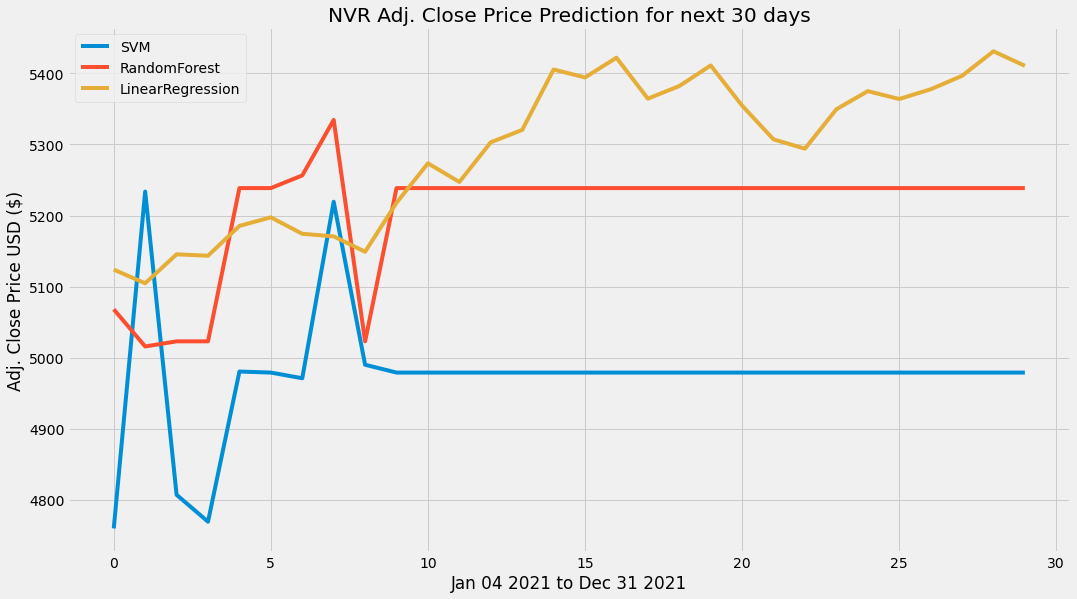

In [121]:
# visualizing the data
plt.figure(figsize=(16,9))

plt.plot(svr_prediction, label = 'SVM')
plt.plot(rf_prediction, label = 'RandomForest')
plt.plot(lr_prediction, label = 'LinearRegression')
plt.title('NVR Adj. Close Price Prediction for next 30 days')
plt.xlabel('Jan 04 2021 to Dec 31 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()